Current problems:
* When the join happens weirdly (I think it might be when something from one end of the list is joined with something from the other and, something is messed up, maybe something with the alphabetic order in the join that makes numbers in the names_dict weird....)

In [219]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [284]:

#ok, let's try with a class
class Tree:
    def __init__ (self,name):
        self.name=name
        self.next=[]
        self.components=[self.name]
    def __str__(self):
        return f"{self.name} {self.next}"
    def __repr__(self):
        return f"Tree(name='{self.name}', next={self.next})"
    @classmethod
    def add(cls, tree1, tree2):
        alphabet=sorted(tuple[tree1,tree2]) #this part was an attempt to solve problem mentioned above but that did not work
        tree1=alphabet[0]
        tree2=alphabet[1]
        if not tree1.next:
            tree1.next.append(tree2)
        else:
            tree1.next.append(tree2)
        #tree1.name = tree1.name + "," + tree2.name
        tree1.components = tree1.components + tree2.components
        del tree2

In [285]:
matrixx=np.array([["",int(19),"a","b"],["",int(2),"b","c"],["",int(2),"d","c"],["",int(4),"d","b"],["",int(7),"d","a"],["",44,"b","e"],["",int(14),"f","g"],["",int(3),"g","a"]])
print(matrixx)

[['' '19' 'a' 'b']
 ['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '44' 'b' 'e']
 ['' '14' 'f' 'g']
 ['' '3' 'g' 'a']]


In [286]:
#now to sorting the matrix
sorted_indices = np.lexsort((matrixx[:, 1].astype(int),))
E = matrixx[sorted_indices]
print(E)

[['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '3' 'g' 'a']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '14' 'f' 'g']
 ['' '19' 'a' 'b']
 ['' '44' 'b' 'e']]


In [287]:
min0,min1,min2=E[0][1],E[0][2],E[0][3] #extracting minmum path from the sorted matrix (E)
print(min0,min1,min2)

2 b c


In [288]:
names= np.unique(matrixx[:, 2:])
print(names)
name_dict= {letter:i for i, letter in enumerate(names)}
print(name_dict)

trees=[]
for item in names:
    trees.append(Tree(item))
    x=0
for i,item in enumerate(E):
    while len(set(name_dict.values()))>1:
        print("\n \n new loop started")
        print("iteration"+str(x))
        print("dict, begin it"+str(x))
        print(name_dict)
        print("trees, begin it"+str(x))
        print(trees)
        min0,min1,min2=E[x][1],E[x][2],E[x][3] #get the next line in the matrix to get the letters/names of the trees
        tree1_id= name_dict[min1] #getting the positions of the letters in the current list of trees
        tree2_id= name_dict[min2]
        if tree2_id==tree1_id:
            print("i entered the break place with"+ str(tree1_id)+"and"+str(tree2_id))
            x+=1
            break
        else:
            E[x][0]="*"
            print("id tree1:")
            print(tree1_id)
            print("id tree 2:")
            print(tree2_id)
            tree1=trees[tree1_id] #get the first tree
            tree2=trees[tree2_id] #get he second tree
            Tree.add(tree1,tree2) #merge the two trees, meaning that our tree-list gets shorter. PROBLEM THOUGH: the last it. does not fully merge right now----
            trees.pop(tree2_id) #remove the tree that we just merged into another tree
            #name_dict = {key: value if value <= tree1_id else tree1_id for key, value in name_dict.items()}
            if tree1_id<tree2_id:
                name_dict[min2]=tree1_id # update the number associated with the letter/treee in the dictionary
                name_dict = {key: (value - 1) if value > tree1_id else value for key, value in name_dict.items()}
            else:
                name_dict[min1]=tree2_id # update the number associated with the letter/treee in the dictionary
                name_dict = {key: (value - 1) if value > tree2_id else value for key, value in name_dict.items()}
            print("trees and dict after it."+str(x)+":")
            print(trees)
            print(name_dict)
            print(E)
            x+=1
res_mat=E
            

['a' 'b' 'c' 'd' 'e' 'f' 'g']
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}

 
 new loop started
iteration0
dict, begin it0
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
trees, begin it0
[Tree(name='a', next=[]), Tree(name='b', next=[]), Tree(name='c', next=[]), Tree(name='d', next=[]), Tree(name='e', next=[]), Tree(name='f', next=[]), Tree(name='g', next=[])]
id tree1:
1
id tree 2:
2


TypeError: 'types.GenericAlias' object is not iterable

In [289]:
#ok, now it could be really funny to see if I can draw the result!! #I start with my result from before.
print(res_mat)
edges=[]

for row in res_mat:
    weight = int(row[1])  # Extract the weight from the second column
    node1 = row[2]  # Extract the first node from the third column
    node2 = row[3]  # Extract the second node from the fourth column
    edges.append((node1, node2, {'weight': weight}))  # Add the tuple to the list

print(edges)

edges_in_min_path=[]

for row in res_mat:
    if row[0]=="*":  # Extract the weight from the second column
        node1 = row[2]  # Extract the first node from the third column
        node2 = row[3]  # Extract the second node from the fourth column
        edge=tuple(sorted([node1,node2]))
        edges_in_min_path.append(edge) # Add the tuple to the list

print(edges_in_min_path)
edges_in_min_path.sort()
print(edges_in_min_path)

[['*' '2' 'b' 'c']
 ['*' '2' 'd' 'c']
 ['*' '3' 'g' 'a']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['*' '14' 'f' 'g']
 ['' '19' 'a' 'b']
 ['' '44' 'b' 'e']]
[('b', 'c', {'weight': 2}), ('d', 'c', {'weight': 2}), ('g', 'a', {'weight': 3}), ('d', 'b', {'weight': 4}), ('d', 'a', {'weight': 7}), ('f', 'g', {'weight': 14}), ('a', 'b', {'weight': 19}), ('b', 'e', {'weight': 44})]
[('b', 'c'), ('c', 'd'), ('a', 'g'), ('f', 'g')]
[('a', 'g'), ('b', 'c'), ('c', 'd'), ('f', 'g')]


['a', 'b', 'c', 'd', 'e', 'f', 'g']
[('a', 'g'), ('a', 'd'), ('a', 'b'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('f', 'g')]
[('a', 'g'), ('b', 'c'), ('c', 'd'), ('f', 'g')]


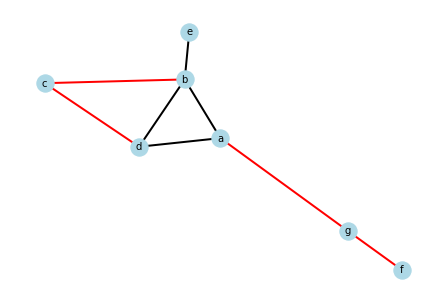

[('a', 'g'), ('b', 'c'), ('c', 'd'), ('f', 'g')]


In [291]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(np.unique(E[:, 2:]))
G.add_edges_from(edges)
shortest_path=edges_in_min_path

print(G.nodes)
print(G.edges)
print(shortest_path)

pos = nx.spring_layout(G)
edge_colors = ['red' if e in shortest_path else 'black' for e in G.edges()] #
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, width=2, font_size=10)

# Show the plot
plt.show() #ummmm it's not coloring the d-b-path... which is strange!!! but otherwise pretty cool

print(edges_in_min_path)